## Report project basic of mobile robotics - group 17
### About us

### Project description

### Code implementation
##### 0. Import needed libraries


In [1]:
from vision.map import * # Import map library
from tdmclient import ClientAsync # Import thymio library
from utils.exceptions import * # Import exceptions
from global_navigation.main import *
from vision.camera import *
from utils.settings import *
import time
import math

## 1. Computer Vision
### 1.1. Map creation
#### 1.1.1 Data loading and needed variables initialization

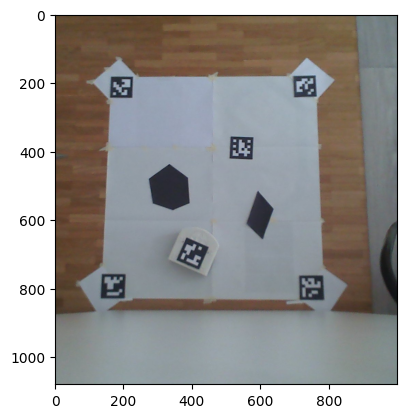

In [2]:
# Prepare data for the demo
camera_frame_path = "report_images/vision/camera_frame.jpg"

# Initialize the map (load an image from a file) 
cam = Camera(frame_path=camera_frame_path)
frame,_ = cam.get_frame()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(frame[:,500:1500,:])
plt.show()

#### 1.1.2 Corners detection and definition of the transformation matrix 

In [3]:
# Detect the corners markers
markers = Marker()
detected_markers = markers.detect(cam,n_iterations=1)
frame_with_markers = frame.copy()
# Display the coordinates of the markers on the image
for k in detected_markers.keys():
    if k in IDS_CORNER_MARKERS:
        marker = detected_markers[k]
        # Draw the origin of the marker with a different color
        cv2.circle(frame_with_markers,tuple(np.array(marker["points"][0]).astype(int)),10,(0,0,255),-1)

# Use the markers found to compute a transformation matrix such the corner markers are in the vertices of a square
_,frame_cut = cam.get_frame()
frame_cut = cv2.cvtColor(frame_cut, cv2.COLOR_BGR2RGB)

# Display frame with markers next to frame_cut
fig,ax = plt.subplots(1,2,figsize=(10,8))
ax[0].imshow(frame_with_markers[:,500:1500,:])
ax[1].imshow(frame_cut)
# Remove the axis
for a in ax:
    a.axis("off")
plt.show()

KeyboardInterrupt: 

#### 1.1.3 Obstacles detection and enlargement

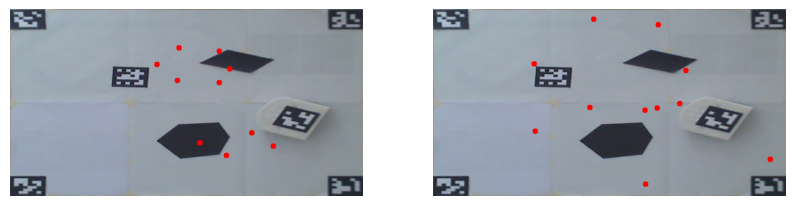

In [ ]:
# Create a map
m = Map(cam)
# Find the obstacles
m.findObstacles(number_of_obstacles=2)
# Create a map with the obstacles vertices
map_with_obstacles = frame_cut.copy()
# Draw the original obstacles on the map_with_obstacles
for obstacle in m.obstacles_original:
    for p in obstacle:
        pinv = p.copy()
        # Invert the y coordinate
        pinv[1] = frame_cut.shape[0]-pinv[1]
        pinv = tuple(np.array(pinv).astype(int))
        cv2.circle(map_with_obstacles,pinv,5,(255,0,0),-1)
# Create a map with the enlarged obstacles
map_with_enlarged_obstacles = frame_cut.copy()
# Draw the enlarged obstacles on the map_with_enlarged_obstacles
for obstacle in m.obstacles:
    for p in obstacle:
        pinv = p.copy()
        # Invert the y coordinate
        #pinv[1] = frame_cut.shape[0]-pinv[1]
        pinv = tuple(np.array(pinv).astype(int))
        cv2.circle(map_with_enlarged_obstacles,pinv,5,(255,0,0),-1)
# Display the maps
fig,ax = plt.subplots(1,2,figsize=(10,8))
ax[0].imshow(map_with_obstacles)
ax[1].imshow(map_with_enlarged_obstacles)
# Remove the axis
for a in ax:
    a.axis("off")
plt.show()


#### 1.1.4 Final goal and initial position detection

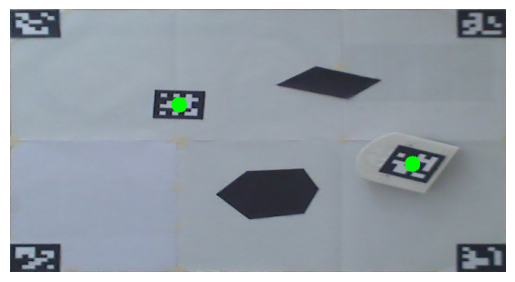

In [ ]:
# Find initial and final positions
initial, final = m.getInitialFinalPoints()

# Display the initial and final positions
map_with_initial_final = frame_cut.copy()
# Draw the initial and final positions on the map_with_initial_final
for p in [initial,final]:
    pinv = p.copy()
    # Invert the y coordinate
    pinv[1] = frame_cut.shape[0]-pinv[1]
    pinv = tuple(np.array(pinv).astype(int))
    cv2.circle(map_with_initial_final,pinv,10,(0,255,0),-1)
# Display the map
plt.imshow(map_with_initial_final)
plt.axis("off")
plt.show()

#### 1.1.5 Map creation

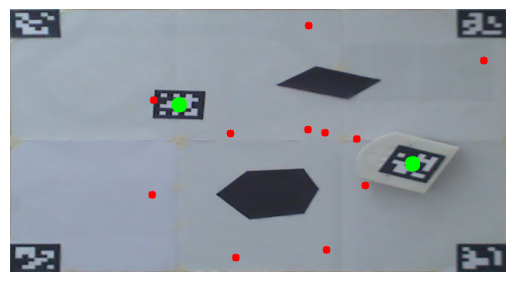

In [ ]:
# Insert enlarged obstacles, initial and final positions in the map
fullMap = frame_cut.copy()

# Draw the enlarged obstacles on the fullMap
for obstacle in m.obstacles:
    for p in obstacle:
        # Invert the y coordinate
        p_inv = p.copy()
        p_inv[1] = frame_cut.shape[0]-p[1]
        p_inv = tuple(np.array(p_inv).astype(int))
        cv2.circle(fullMap,p_inv,5,(255,0,0),-1)

# Draw the initial and final positions on the fullMap
for p in [initial,final]:
    # Invert the y coordinate
    p_inv = p.copy()
    p_inv[1] = frame_cut.shape[0]-p[1]
    p_inv = tuple(np.array(p_inv).astype(int))
    cv2.circle(fullMap,p_inv,10,(0,255,0),-1)

# Display the map
plt.imshow(fullMap)
plt.axis("off")
plt.show()

### 1.2 Real time detection of position and orientation

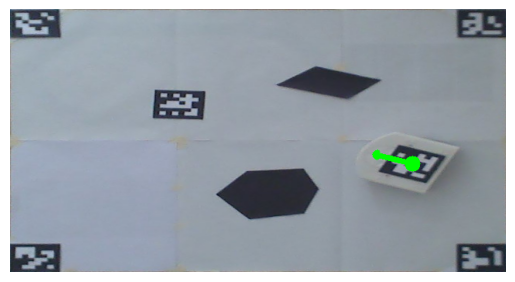

In [ ]:
# Draw the position and the orientation
orientationPositionMap = frame_cut.copy()

# Obtain the position and the orientation
p,theta = m.cameraRobotSensing()

# Draw the robot position
p_inv = p.copy()
p_inv[1] = frame_cut.shape[0]-p[1]
p_inv = tuple(np.array(p_inv).astype(int))
cv2.circle(orientationPositionMap,p_inv,10,(0,255,0),-1)

# Draw the robot orientation
p2 = (p_inv[0]+50*np.cos(theta),p_inv[1]-50*np.sin(theta))
p2 = tuple(np.array(p2).astype(int))
cv2.arrowedLine(orientationPositionMap,p_inv,p2,(0,255,0),5)

# Display the map
plt.imshow(orientationPositionMap)
plt.axis("off")
plt.show()

## 2. Global Navigation
### 2.1 Needed variables definition

In [ ]:
glob = Global(m.obstacles)

### 2.2 Creation of the visibility graph

In [ ]:
# Create visibility graph,and plot it
glob.initialPoint = initial
glob.finalPoint = final

glob.plot_visibility()

TypeError: Global.find_visible_lines() missing 2 required positional arguments: 'initialPoint' and 'finalPoint'

### 2.3 Dijkstra algorithm

In [ ]:
glob.find_optimal_path(initial, final)
m.plot(initial, final, path= glob.optimal_path)

KeyError: 1

### 2.4 Global controller

## 3. Local Navigation

## 4. Filtering

#### Estimation of the covariance matrix of the camera

In [ ]:
# Import all the needed libraries
from vision.camera import *
from vision.map import *
from time import *
from time import *
import json
import sys, os

# Initialize the modules
cam = Camera()
map = Map(cam, number_of_obstacles=0, robot_size=0)

# Define some parameters for the experiments
N_iterations = 100
real_x = None
real_y = None
real_theta = None

print("Starting measurements...")

# Verify if the file exists
file_name = "measurements.json"
if not os.path.isfile(file_name):
    # Create the file
    with open(file_name,"w+") as file:
        file.write("{}")

# Open the files to save the data in
file_name = "measurements.json"
with open(file_name,"r+") as file:
    data = json.load(file)
    if data is None:
        data = {}

    # Get the index of the new data
    index = len(data)

    # Create a new entry for the new data
    data_collect = {}
    if real_x is not None and real_y is not None:
        data_collect["real_x"] = real_x
        data_collect["real_y"] = real_y
    if real_theta is not None:
        data_collect["real_theta"] = real_theta
    
    # Collect the measurements
    measurements = []
    for i in range(N_iterations):
        if i % 100 == 0 and i != 0:
            print("Iteration: {}/{}".format(i,N_iterations))
        p,theta = map.cameraRobotSensing()
        measurements.append({"p":p.tolist(),"theta":theta})

    # Save the measurements
    data_collect["measurements"] = measurements
    data[index] = data_collect

    # Delete all the data from measurements.json and save the new data
    file.seek(0)
    file.truncate()
    json.dump(data,file)

print("Done!")

KeyboardInterrupt: 

## 5. Demo

In [1]:
from vision.map import * # Import map library
from tdmclient import ClientAsync # Import thymio library
from utils.exceptions import * # Import exceptions
from global_navigation.main import * # Import global navigation library
from local_navigation.localNav import * # Import local navigation library
from vision.camera import * # Import camera library
from utils.settings import * # Import settings
from time import * # Import time
from filtering.kalman_filter import * # Import Kalman filter
import traceback # Import traceback

##### Variables definition #####
start = goal = None
camera_state = 'on'
time_start = time()

try:
    ##### Connection to the robot #####
    client = ClientAsync()
    node = await client.wait_for_node()
    await node.lock()

    ##### Map creation and components creation #####
    cam = Camera()
    map = Map(cam, number_of_obstacles=3, robot_size=40)
    map.findObstacles()
    cam.obstacles = map.obstacles
    glob = Global(map.obstacles)
    #local = Local()

    ##### Loop #####
    while not glob.goal_reached:  

        ## Final and initial position estimation and path planning ##
        if start is None or goal is None:
            # Get the initial point, orientation and the final point and set them for the camera
            start, initialOrientation, goal = map.getInitialFinalData()
            cam.startPosition = start
            cam.goalPosition = goal

            # Compute the optimal path and set it for the camera
            glob.find_optimal_path(start, goal)
            cam.optimalPath = glob.optimal_path

            # Set up the kalman filter
            start_pos = np.array([start[0], start[1], 0])
            start_pos = map.convertToCm([start_pos])[0]
            kalman = KalmanFilter(start_pos, initialOrientation)

            # Define some parameters to compute the time sampling
            time_last_sample = time()
            time_sampling = None

            # Skip the first iteration
            continue

        ## Sensing ##
        await node.wait_for_variables() # Wait for the sensors to be updated
        cameraPos_measured, cameraOrientation_measured = map.cameraRobotSensing() # Robot position and orientation from the camera
        cameraPos_measured_cm, cameraOrientation_measured_rad = map.cameraRobotSensing(isInCm=True) # Robot position and orientation from the camera
        #prox_horizontal_measured = node["prox.horizontal"] # Horizontal proximity sensors
        left_speed_measured = node["motor.left.speed"] # Motor speed
        right_speed_measured = node["motor.right.speed"]

        ## Kidnapping management ##
        if False:
            pass
        else:

            ## Position estimation ##
            if cameraPos_measured is None or cameraOrientation_measured is None:
                cam_x = cam_y = cam_theta = -1
            else:
                cam_x = cameraPos_measured_cm[0]
                cam_y = cameraPos_measured_cm[1]
                if(cameraOrientation_measured_rad > np.pi):
                    cam_theta = cameraOrientation_measured_rad - 2*np.pi
                else:
                    cam_theta = cameraOrientation_measured_rad
            time_sampling = time() - time_last_sample
            [pos_estimated_x, pos_estimated_y, pos_estimated_theta] = kalman.update_kalman(left_speed_measured, right_speed_measured, camera_state, time_sampling, np.array([cam_x, cam_y, cam_theta]))
            cam.robotEstimatedPosition = np.array([pos_estimated_x, pos_estimated_y])
            cam.robotEstimatedPosition = map.convertToPx([cam.robotEstimatedPosition])[0]
            cam.robotEstimatedOrientation = pos_estimated_theta
            print("Estimated Orientation : ", cam.robotEstimatedOrientation, ", Measured Orientation : ", cameraOrientation_measured)
            print("Dif : ", cam.robotEstimatedOrientation - cameraOrientation_measured)
            
            ## Control ##
            if False: #local.local_obstacle(prox_horizontal):
                #motorLeft,motorRight = local.local_controller(prox_horizontal)
                pass
            else:
                motorLeft = motorRight = 0
                if not (cameraPos_measured is None or cameraOrientation_measured is None):
                    motorLeft,motorRight = glob.global_controller(cameraPos_measured, cameraOrientation_measured)
            
            ## Actuation ##
            v = { "motor.left.target": [round(motorLeft)], "motor.right.target": [round(motorRight)] }
            await node.set_variables(v)
            time_last_sample = time()
        
        ## Real time display ##
        cam.robotMeasuredPosition = cameraPos_measured
        cam.robotMeasuredOrientation = cameraOrientation_measured
        
        if(cam.display()):
            break
        await client.sleep(0.1)

        ## Data needed for kalman ##
        print("Time spent : ", time() - time_start)
        if(((time()-time_start)>20)and(time()-time_start)<30):
            camera_state = 'off'
        else:
            camera_state = 'on'
except Exception as e:
    print(e)
    traceback.print_exc()
finally:
    # Stop the robot
    v = { "motor.left.target": [round(0)], "motor.right.target": [round(0)] }
    await node.set_variables(v)

    # Unlock the robot
    await node.unlock()

    # Turn off the camera
    cam.release()
    cv2.destroyAllWindows()

Estimated Orientation :  0 , Measured Orientation :  0.10740037262439728
Dif :  -0.10740037262439728
Time spent :  2.384458303451538
Estimated Orientation :  0.06069214437172922 , Measured Orientation :  0.10740037262439728
Dif :  -0.04670822825266806
Time spent :  2.743030309677124
Estimated Orientation :  -0.027145178296037957 , Measured Orientation :  0.0598449669778347
Dif :  -0.08699014527387267
Time spent :  3.1402881145477295
Estimated Orientation :  -0.133611489844812 , Measured Orientation :  6.248039555047647
Dif :  -6.381651044892459
Time spent :  3.540733814239502
Estimated Orientation :  -0.17711363068209046 , Measured Orientation :  6.248039555047647
Dif :  -6.425153185729738
Time spent :  3.9485373497009277
Estimated Orientation :  -0.2441657539827945 , Measured Orientation :  6.198959972952501
Dif :  -6.443125726935295
Time spent :  4.3542258739471436
Estimated Orientation :  -0.2875271763325081 , Measured Orientation :  6.102825585995809
Dif :  -6.390352762328318
Time 

#### Data collection for Kalman

In [ ]:
from vision.map import * # Import map library
from tdmclient import ClientAsync # Import thymio library
from utils.exceptions import * # Import exceptions
from global_navigation.main import * # Import global navigation library
from local_navigation.localNav import * # Import local navigation library
from vision.camera import * # Import camera library
from utils.settings import * # Import settings
from time import * # Import time
from filtering.kalman_filter import * # Import Kalman filter
import traceback # Import traceback
import json

##### Variables definition #####
start = goal = None
time_start = time()
data_kalman = {}

try:
    ##### Connection to the robot #####
    client = ClientAsync()
    node = await client.wait_for_node()
    await node.lock()

    ##### Map creation and components creation #####
    cam = Camera()
    map = Map(cam, number_of_obstacles=3, robot_size=40)
    map.findObstacles()
    cam.obstacles = map.obstacles
    glob = Global(map.obstacles)
    #local = Local()

    ##### Loop #####
    while not glob.goal_reached:  

        ## Final and initial position estimation and path planning ##
        if start is None or goal is None:
            # Get the initial point, orientation and the final point and set them for the camera
            start, initialOrientation, goal = map.getInitialFinalData()
            cam.startPosition = start
            cam.goalPosition = goal

            # Compute the optimal path and set it for the camera
            glob.find_optimal_path(start, goal)
            cam.optimalPath = glob.optimal_path

            # Set up the kalman filter
            start_pos = np.array([start[0], start[1], 0])
            start_pos = map.convertToCm([start_pos])[0]
            kalman = KalmanFilter(start_pos, initialOrientation)

            # Define some parameters to compute the time sampling
            time_last_sample = time()
            time_sampling = None

            # Skip the first iteration
            continue

        ## Sensing ##
        await node.wait_for_variables() # Wait for the sensors to be updated
        cameraPos_measured, cameraOrientation_measured = map.cameraRobotSensing() # Robot position and orientation from the camera
        cameraPos_measured_cm, cameraOrientation_measured_rad = map.cameraRobotSensing(isInCm=True) # Robot position and orientation from the camera
        #prox_horizontal_measured = node["prox.horizontal"] # Horizontal proximity sensors
        left_speed_measured = node["motor.left.speed"] # Motor speed
        right_speed_measured = node["motor.right.speed"]

        ## Kidnapping management ##
        if False:
            pass
        else:

            ## Position estimation ##
            if cameraPos_measured is None or cameraOrientation_measured is None:
                cam_x = cam_y = cam_theta = -1
            else:
                cam_x = cameraPos_measured_cm[0]
                cam_y = cameraPos_measured_cm[1]
                if(cameraOrientation_measured_rad > np.pi):
                    cam_theta = cameraOrientation_measured_rad - 2*np.pi
                else:
                    cam_theta = cameraOrientation_measured_rad
            time_sampling = time() - time_last_sample # Not accurate at the first iteration but motor speed is 0 so it doesn't matter
            #[pos_estimated_x, pos_estimated_y, pos_estimated_theta] = kalman.update_kalman(left_speed_measured, right_speed_measured, camera_state, time_sampling, np.array([cam_x, cam_y, cam_theta]))
            data_kalman[time()] = {
                "left_speed_measured": left_speed_measured,
                "right_speed_measured": right_speed_measured,
                "time_sampling": time_sampling,
                "cam_data": np.array([cam_x, cam_y, cam_theta]).tolist()
            }
            ## Control ##
            if False: #local.local_obstacle(prox_horizontal):
                #motorLeft,motorRight = local.local_controller(prox_horizontal)
                pass
            else:
                motorLeft = motorRight = 0
                if not (cameraPos_measured is None or cameraOrientation_measured is None):
                    motorLeft,motorRight = glob.global_controller(cameraPos_measured, cameraOrientation_measured)
            
            ## Actuation ##
            v = { "motor.left.target": [round(motorLeft)], "motor.right.target": [round(motorRight)] }
            await node.set_variables(v)
            time_last_sample = time()
        
        ## Real time display ##
        cam.robotMeasuredPosition = cameraPos_measured
        cam.robotMeasuredOrientation = cameraOrientation_measured
        
        if(cam.display()):
            break
        await client.sleep(0.1)
except Exception as e:
    print(e)
    traceback.print_exc()
else:
    # Verify if the folder kalman_exp exists
    folder_name = "kalman_exp"
    if not os.path.isdir(folder_name):
        # Create the folder
        os.mkdir(folder_name)
    # Save the data in a file
    file_name = folder_name+f"/data_{time()}.json"
    with open(file_name,"w+") as file:
        json.dump(data_kalman,file)
finally:
    # Stop the robot
    v = { "motor.left.target": [round(0)], "motor.right.target": [round(0)] }
    await node.set_variables(v)

    # Unlock the robot
    await node.unlock()

    # Turn off the camera
    cam.release()
    cv2.destroyAllWindows()